# Content

The goal of this ntb is to show how to replace figure level plots of seaborn with individual axes level plots. Check this [seaborn page](https://seaborn.pydata.org/tutorial/function_overview.html) for more information.

* [Relational plots](#Relational-plots)
* [Distribution plots](#Distribution-plots)


In [1]:
from cand import Canvas, Vector, Point
# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Relational plots

https://seaborn.pydata.org/api.html#relational-plots

---
Replace [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) with axes level plots


___
TODO:

2. changes of font and graphics in CanD
3. make smarter FacetGrid plots

#### 1

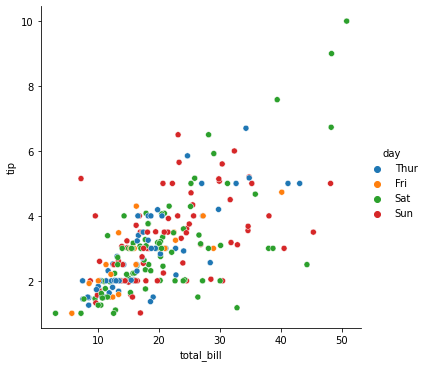

In [2]:
tips = sns.load_dataset("tips")

# Original seaborn plot
sns.relplot(data=tips, x="total_bill", y="tip", hue="day")

## TODO -- changes font size of legend and size of scatter points

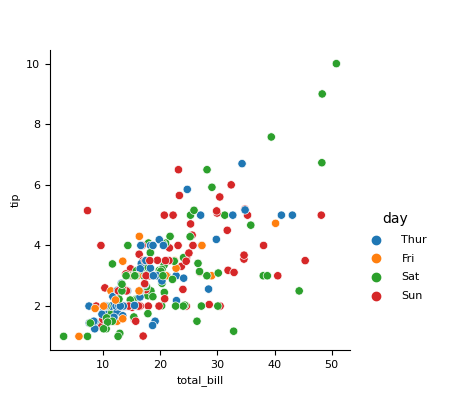

In [3]:
# CanD way

# Create a canvas 6 in x 6 in.
c = Canvas(4.6, 4, "in")

# # Add an axis from the point (0.5,0.5) to (3.5,3.5) in inches.  Name it "scatter"
# c.add_axis("scatter", Point(.5, .5, "in"), Point(3.5, 3.5, "in"))
# # and plot histplot on it
# ax = c.ax("scatter")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(3.5, 3.5, "in"))

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)
# Adjust the legend position
ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

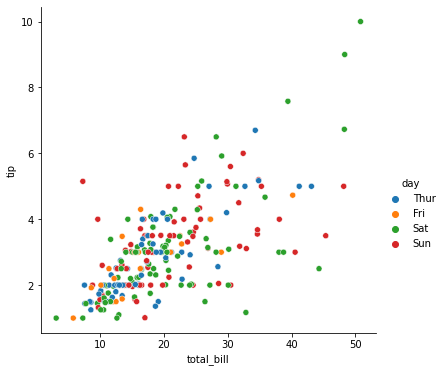

In [4]:
# Matplotlib+Seaborn way (only axes level)

# Create figure and axes
fig, ax = plt.subplots(figsize=(6,6))

# plot the histogram
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust the legend position
ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 2

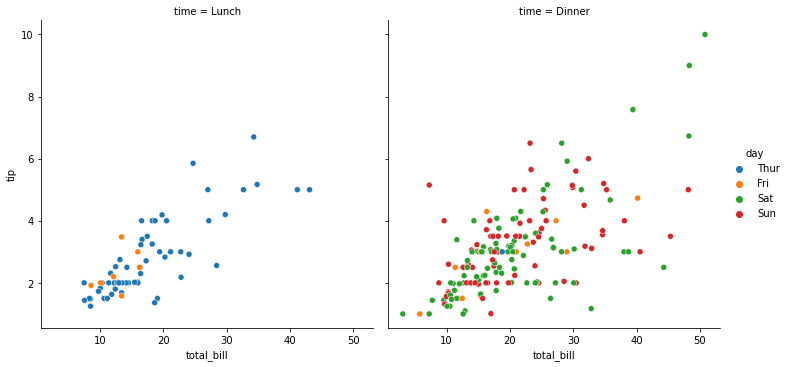

In [5]:
# seaborn
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")

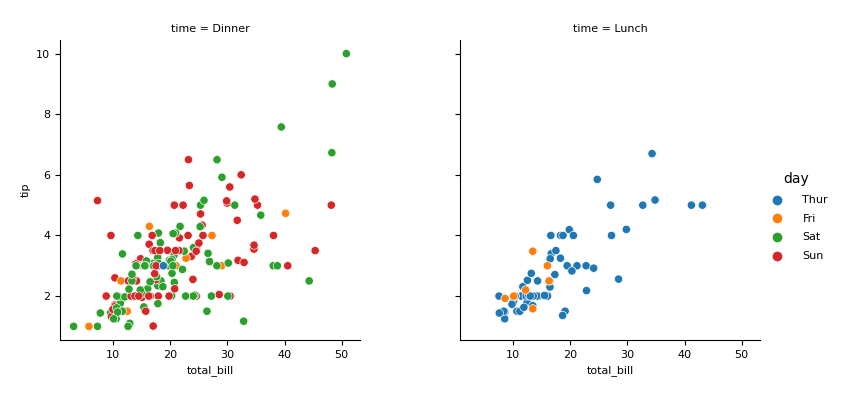

In [6]:
col = "time"
a = tips[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(data=tips[tips[col]==item], x="total_bill", y="tip", hue="day", ax=ax, legend=leg)
    #remove outer right and top spines
    sns.despine(ax=ax)
    # label subplots
    ax.set_title(f"{col} = {item}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        # preferred way
        c.ax(a[0]).sharey(c.ax(a[i]))
        c.ax(a[0]).sharex(c.ax(a[i]))          
        # need to rescale all axis
        c.ax(a[i]).autoscale()           
        # Way 2
#         c.axes[a[0]].sharey(c.axes[a[i]])     

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')
        

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

# # sharey, Way 3
# c.axes["Dinner"].sharey(c.axes["Lunch"])

c.show()

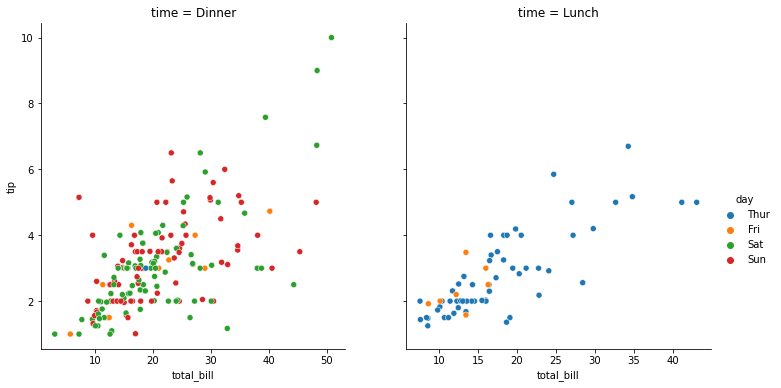

In [7]:
col = "time"
a = tips[col].dropna().unique()

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(data=tips[tips[col]==item], x="total_bill", y="tip", hue="day", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 3 - TODO smart way

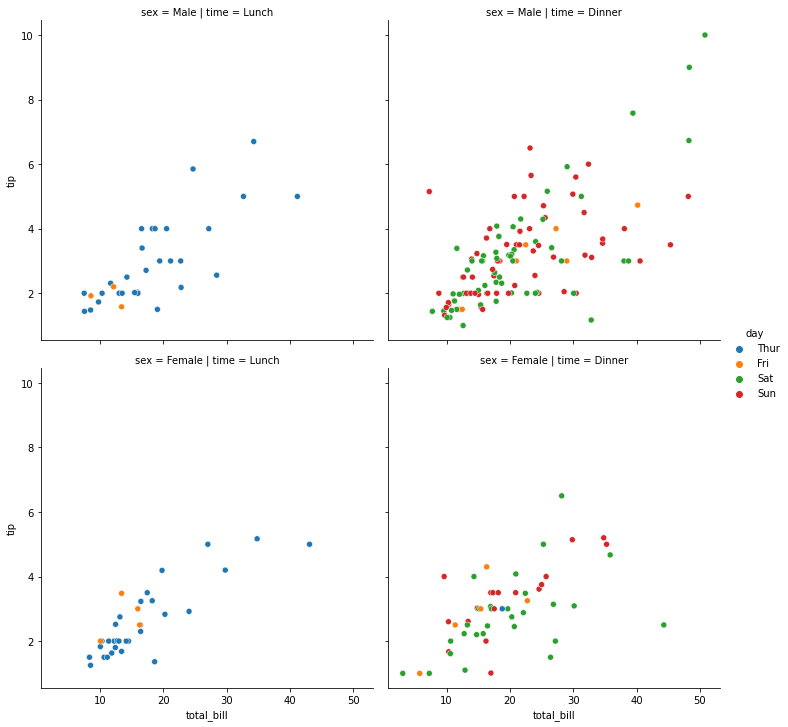

In [8]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

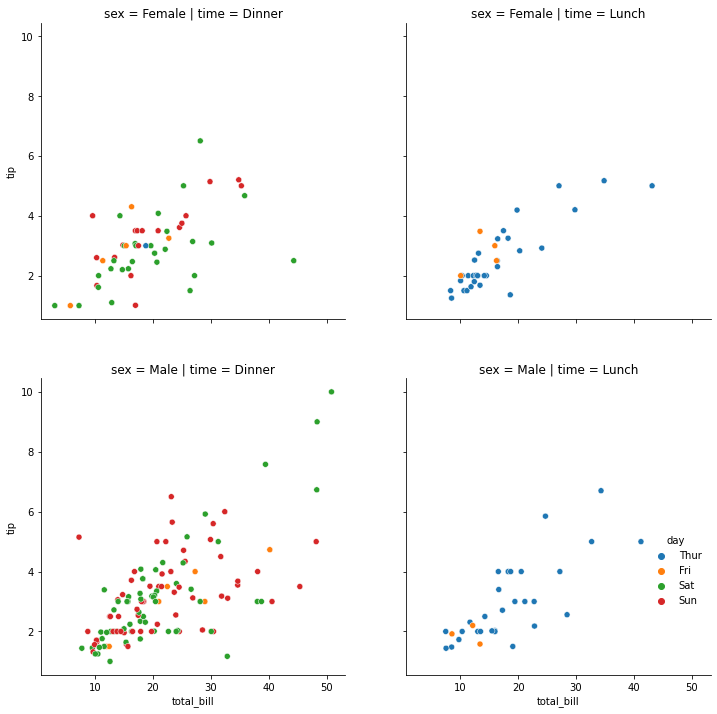

In [9]:
from itertools import product

# matplotlib

# NOTE: the order of seaborns plot is reversed, if one wants to mimic that, one can reverse the order of lists a and b
col = "time"
row = "sex"
a = tips[col].dropna().unique()
b = tips[row].dropna().unique()

fig, axs = plt.subplots(len(b),len(a), figsize=(len(a)*6, len(b)*6), sharey=True, sharex=True)

# we need to get all the possible combinations of the two categories
for (ro, co), ax in zip(list(product(b, a)), axs.flatten()):    
    # plot only the last legend
    if co == a[-1] and ro == b[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(data=tips.loc[(tips[row]==ro) & (tips[col]==co)], x="total_bill", y="tip", hue="day", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{row} = {ro} | {col} = {co}")

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 4 

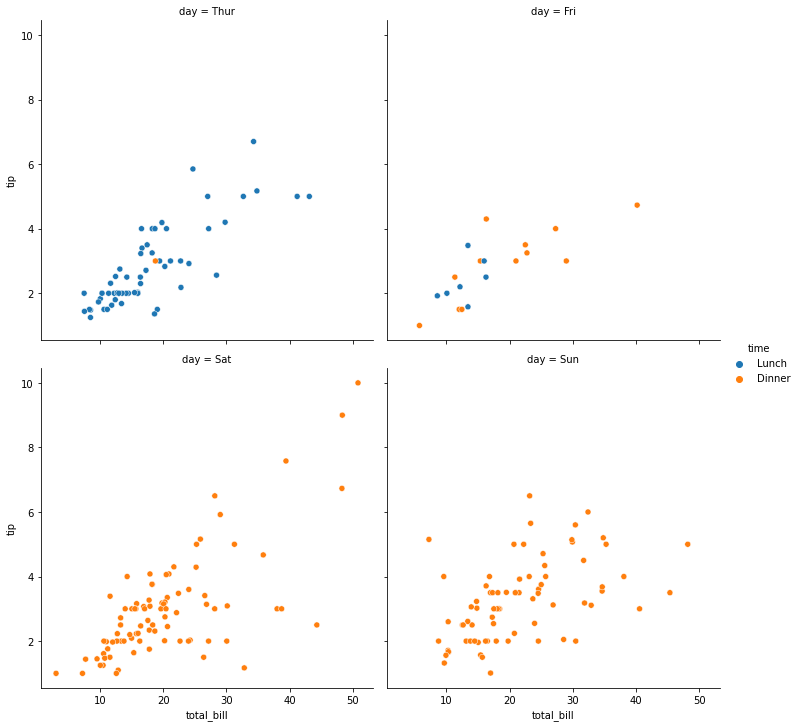

In [10]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day", col_wrap=2)

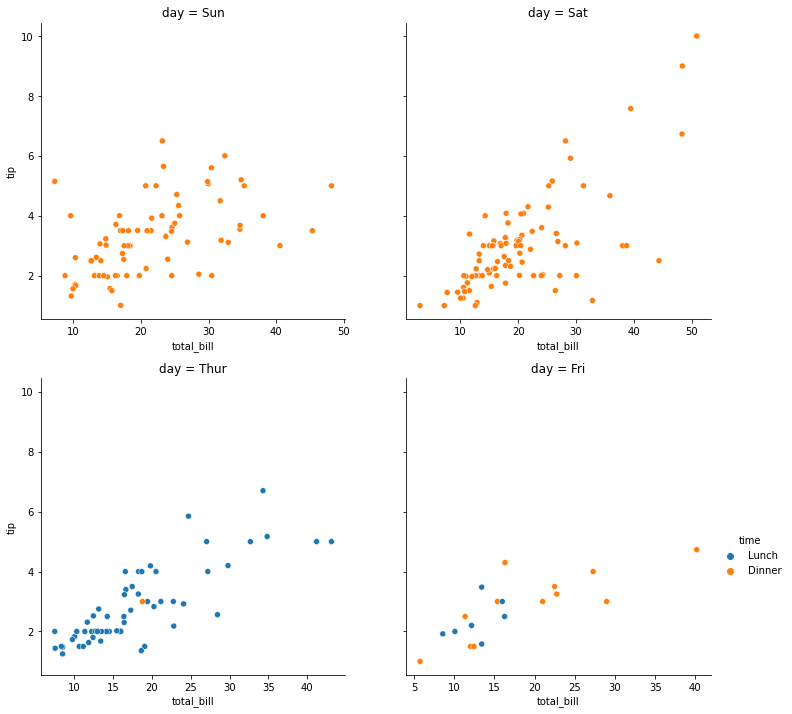

In [11]:
col = "day"
a = tips[col].dropna().unique()
col_wrap=2

fig, axs = plt.subplots(col_wrap,len(a)//col_wrap, figsize=(len(a)*6//col_wrap, 6*col_wrap), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(data=tips[tips[col]==item], x="total_bill", y="tip", hue="time", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 5

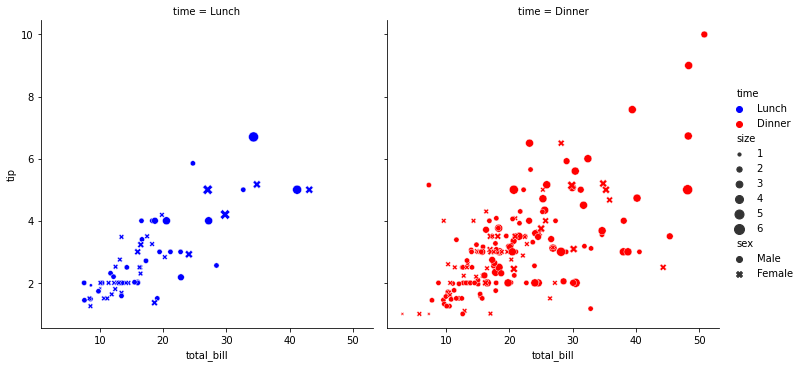

In [12]:
sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(10, 100)
)

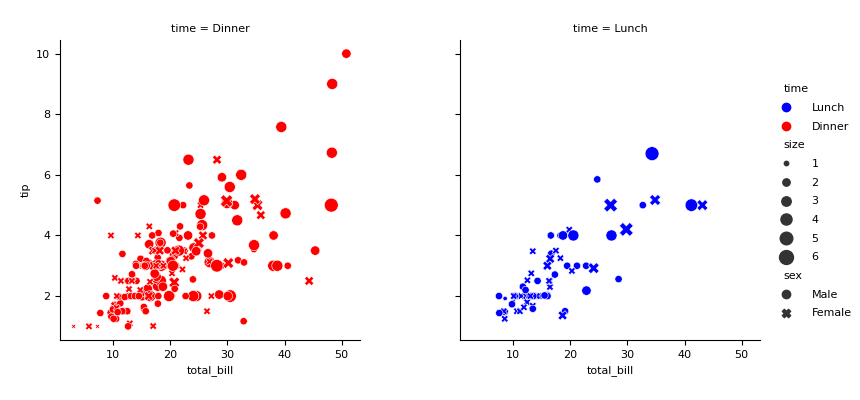

In [13]:
col = "time"
a = tips[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(
        data=tips[tips[col]==item], x="total_bill", y="tip",
        hue="time", size="size", style="sex",
        palette=["b", "r"], sizes=(10, 100), ax=ax, legend=leg
    )

    sns.despine(ax=ax)
    
    ax.set_title(f"{col} = {item}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(a[0]).sharey(c.ax(a[i]))
        c.ax(a[0]).sharex(c.ax(a[i]))          
        # need to rescale all axis
        c.ax(a[i]).autoscale()             

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')    

# position the legend
ax.legend_.set_bbox_to_anchor((1, 0.9))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

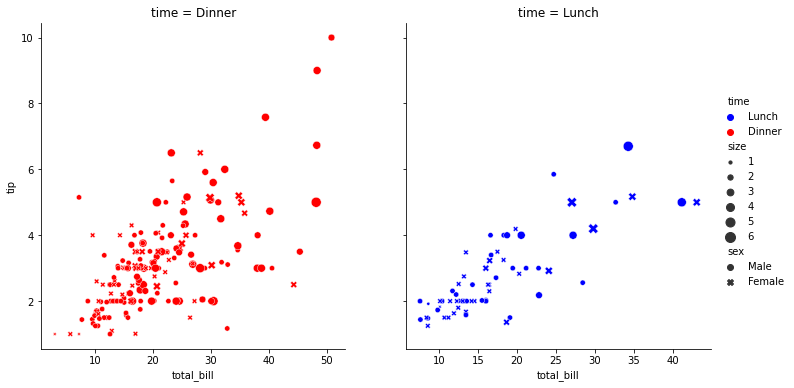

In [14]:
col = "time"
a = tips[col].dropna().unique()

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(
        data=tips[tips[col]==item], x="total_bill", y="tip",
        hue="time", size="size", style="sex",
        palette=["b", "r"], sizes=(10, 100), ax=ax, legend=leg
    )

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, .8))
ax.legend_.get_frame().set_edgecolor('none')

#### 6

In [15]:
fmri = sns.load_dataset("fmri")

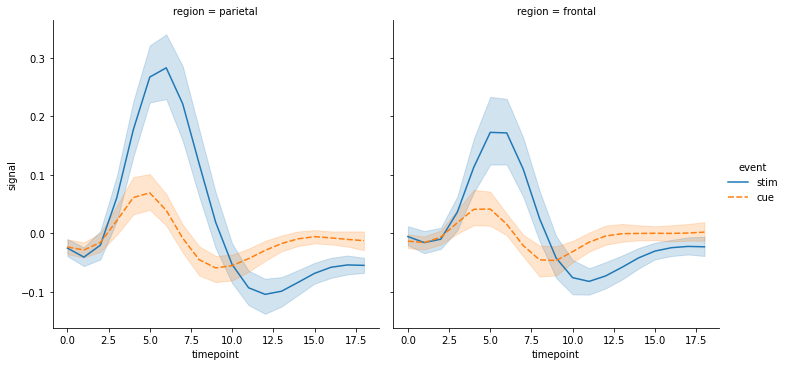

In [16]:
sns.relplot(
    data=fmri, x="timepoint", y="signal", col="region",
    hue="event", style="event", kind="line",
)


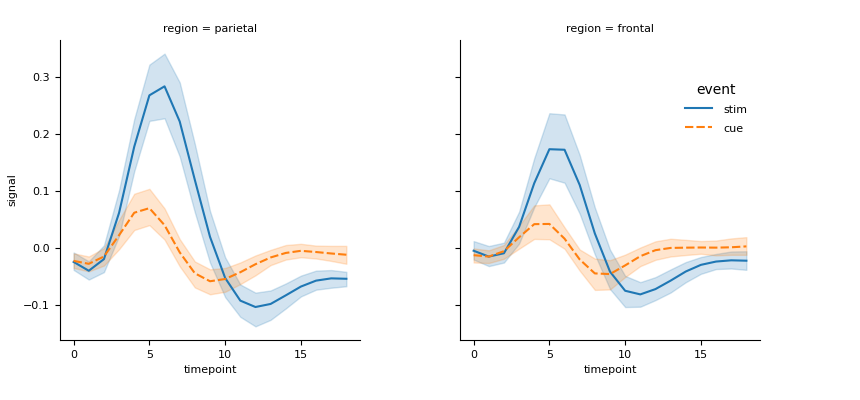

In [17]:
col = "region"
a = fmri[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.lineplot(
        data=fmri[fmri[col]==item], x="timepoint", y="signal",
        hue="event", style="event", ax=ax, legend=leg
    )

    sns.despine(ax=ax)
    
    ax.set_title(f"{col} = {item}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(a[0]).sharey(c.ax(a[i]))
        c.ax(a[0]).sharex(c.ax(a[i]))
        # need to rescale all axis
        c.ax(a[i]).autoscale()           

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')     

# position the legend
ax.legend_.set_bbox_to_anchor((1, 0.9))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

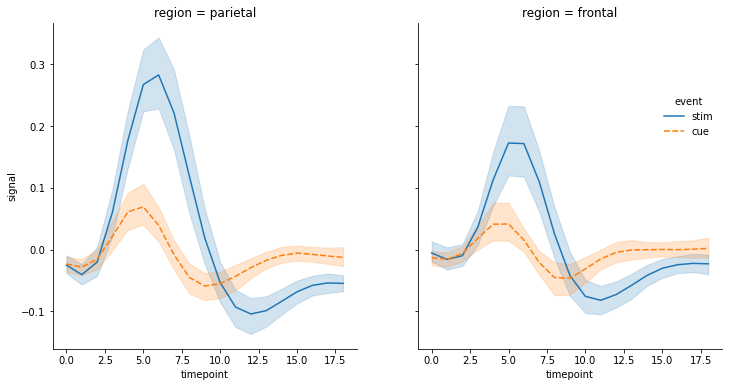

In [18]:
col = "region"
a = fmri[col].dropna().unique()

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.lineplot(
        data=fmri[fmri[col]==item], x="timepoint", y="signal",
        hue="event", style="event", ax=ax, legend=leg
    )

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, .8))
ax.legend_.get_frame().set_edgecolor('none')

#### 7 

Just changing the aspect and the ratio, can be done simply by changing the sizes of the figure in matplotlib or by point coordinates in CanD

#### 8

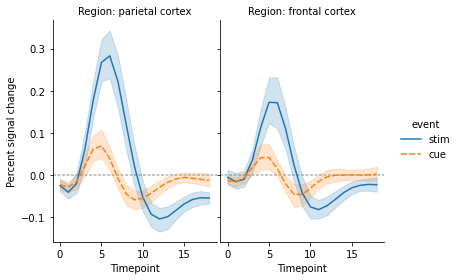

In [19]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
(g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Timepoint", "Percent signal change")
  .set_titles("Region: {col_name} cortex")
  .tight_layout(w_pad=0))

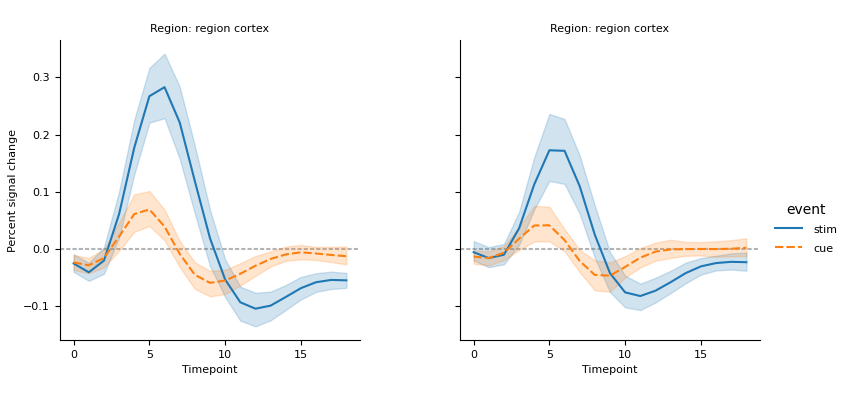

In [20]:
col = "region"
a = fmri[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.lineplot(
        data=fmri[fmri[col]==item], x="timepoint", y="signal",
        hue="event", style="event", ax=ax, legend=leg
    )

    sns.despine(ax=ax)
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(a[0]).sharey(c.ax(a[i]))
        c.ax(a[0]).sharex(c.ax(a[i])) 
        # need to rescale all axis
        c.ax(a[i]).autoscale()   

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')     

    # Add a gorizontal line
    ax.axhline(y=0, color=".7", dashes=(2, 1), zorder=0)
    
    # Add axis titles
    ax.set_xlabel("Timepoint")
    ax.set_title(f"Region: {col} cortex")
    
    if item == a[0]:
        ax.set_ylabel("Percent signal change")
    else:
        ax.set_ylabel("")

# position the legend
ax.legend_.set_bbox_to_anchor((1.3, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

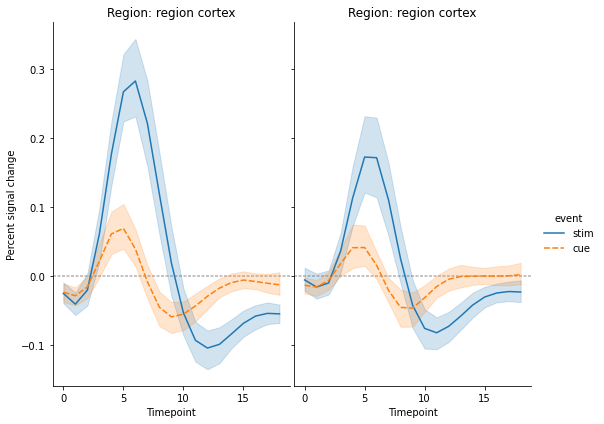

In [21]:
col = "region"
a = fmri[col].dropna().unique()
aspect=.7

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6*aspect, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.lineplot(
        data=fmri[fmri[col]==item], x="timepoint", y="signal",
        hue="event", style="event", ax=ax, legend=leg
    )

    # Add a gorizontal line
    ax.axhline(y=0, color=".7", dashes=(2, 1), zorder=0)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Add axis titles
    ax.set_xlabel("Timepoint")
    ax.set_title(f"Region: {col} cortex")
    
    if item == a[0]:
        ax.set_ylabel("Percent signal change")

ax.legend_.set_bbox_to_anchor((1.3, .5))
ax.legend_.get_frame().set_edgecolor('none')
plt.tight_layout(w_pad=0)

#### 9

In [22]:
flights_wide = sns.load_dataset("flights").pivot("year", "month", "passengers")

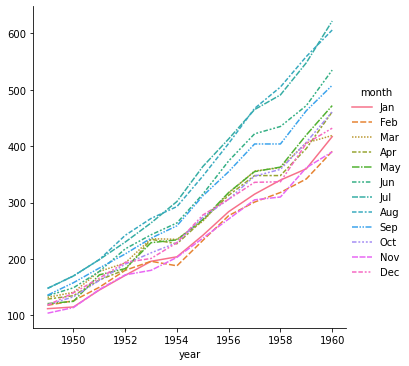

In [23]:
sns.relplot(data=flights_wide, kind="line")

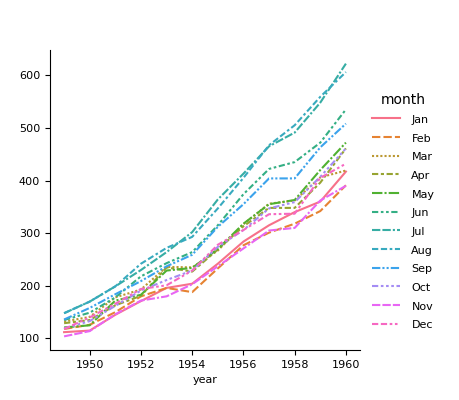

In [24]:
# CanD way

# Create a canvas 6 in x 6 in.
c = Canvas(4.6, 4, "in")

ax = c.add_axis("lineplot", Point(.5, .5, "in"), Point(3.6, 3.5, "in"))

# plot the lineplot
sns.lineplot(data=flights_wide, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)
# adjust legend place
ax.legend_.set_bbox_to_anchor((1, .9))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

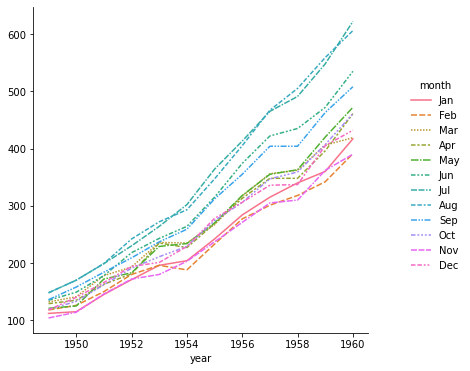

In [25]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(6,6))

# plot the lineplot
sns.lineplot(data=flights_wide, ax=ax)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# adjust legend place
ax.legend_.set_bbox_to_anchor((1.3, .8))
ax.legend_.get_frame().set_edgecolor('none')

--------

# Distribution plots

https://seaborn.pydata.org/api.html#distribution-api

---
Replace [displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) with axes level plots

#### 1

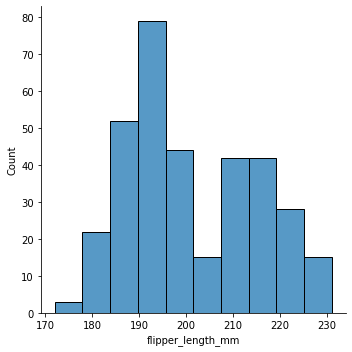

In [26]:
# Original seaborn plot
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm")

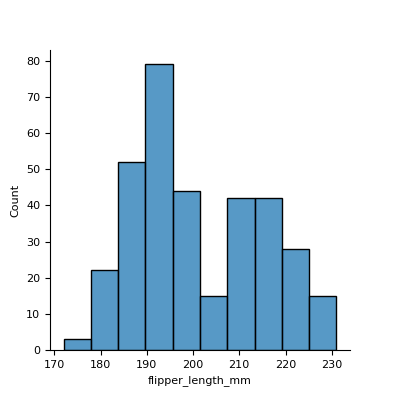

In [27]:
# CanD way

# Create a canvas 6 in x 6 in.
c = Canvas(4, 4, "in")

# # Add an axis from the point (0.5,0.5) to (3.5,3.5) in inches.  Name it "histplot"
# c.add_axis("histplot", Point(.5, .5, "in"), Point(3.5, 3.5, "in"))
# # and plot histplot on it
# ax = c.ax("histplot")

# alternative one-liner
ax = c.add_axis("histplot", Point(.5, .5, "in"), Point(3.5, 3.5, "in"))

sns.histplot(data=penguins, x="flipper_length_mm", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

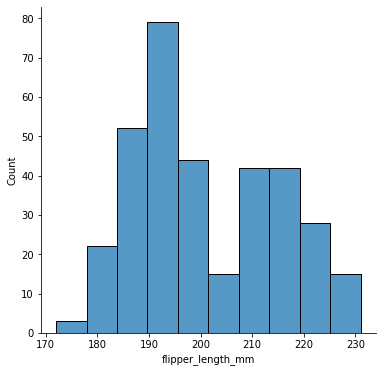

In [28]:
# Matplotlib+Seaborn way (only axes level)

# Create figure and axes
fig, ax = plt.subplots(figsize=(6,6))

# plot the histogram
sns.histplot(data=penguins, x="flipper_length_mm")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### 2

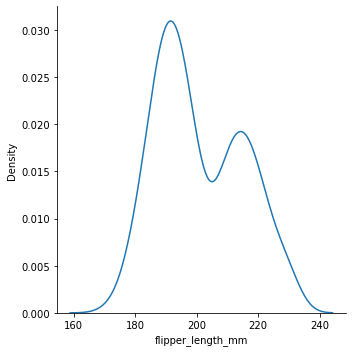

In [29]:
# seaborn
sns.displot(data=penguins, x="flipper_length_mm", kind="kde")

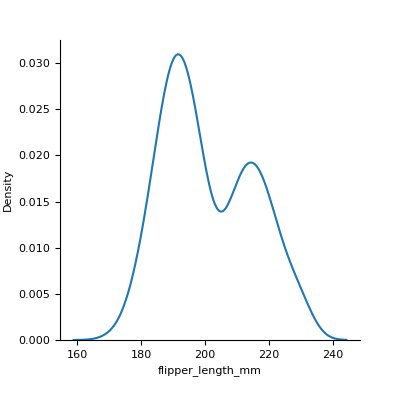

In [30]:
# CanD

c = Canvas(4, 4, "in")

ax = c.add_axis("kdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.kdeplot(data=penguins, x="flipper_length_mm", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

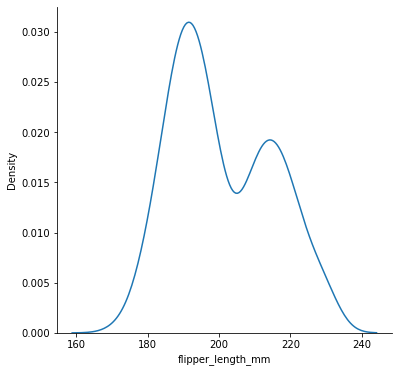

In [31]:
# Matplotlib
fig, ax = plt.subplots(figsize=(6,6))

sns.kdeplot(data=penguins, x="flipper_length_mm", ax=ax)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### 3

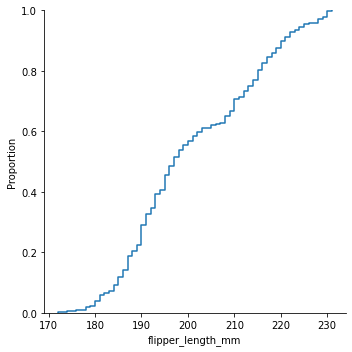

In [32]:
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")

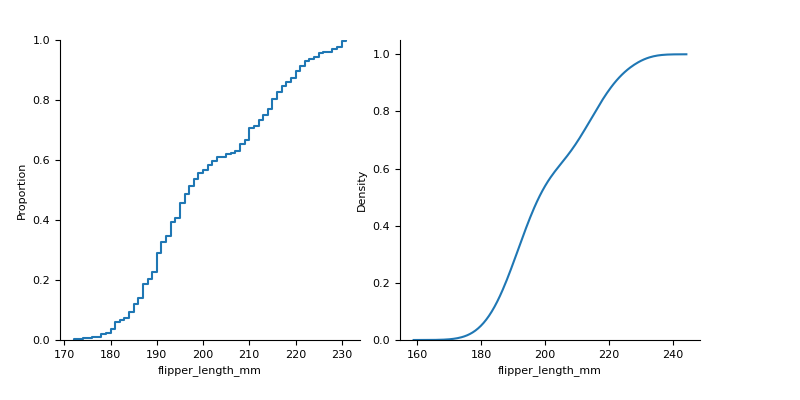

In [33]:
# CanD

c = Canvas(8, 4, "in")

# ECDF plot
ax1 = c.add_axis("ecdfplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.ecdfplot(data=penguins, x="flipper_length_mm", ax=ax1)
sns.despine(ax=ax1)

# KDE plot
ax2 = c.add_axis("kdeplot", Point(4, .6, "in"), Point(7, 3.6, "in"))

sns.kdeplot(data=penguins, x="flipper_length_mm", cumulative=True, ax=ax2)
sns.despine(ax=ax2)

c.show()

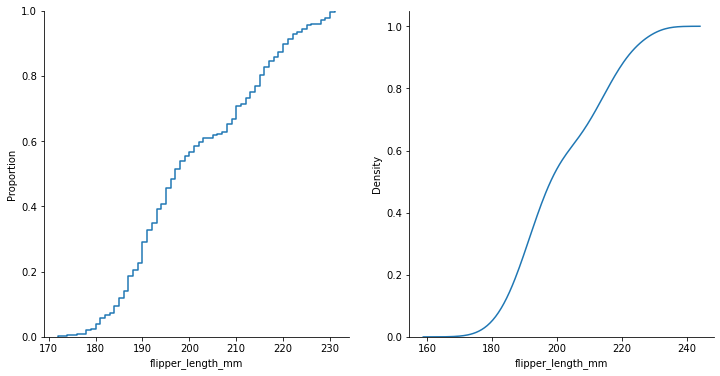

In [34]:
# matplotlib
fig, axs = plt.subplots(1,2, figsize=(12,6))

sns.ecdfplot(data=penguins, x="flipper_length_mm", ax=axs[0])
sns.kdeplot(data=penguins, x="flipper_length_mm", cumulative=True, ax=axs[1])

for ax in axs:
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

#### 4

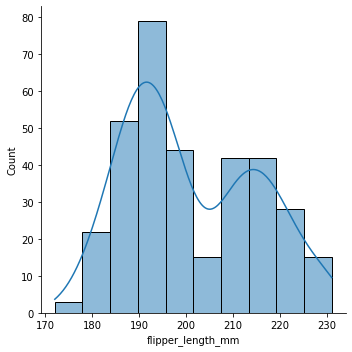

In [35]:
# seaborn
sns.displot(data=penguins, x="flipper_length_mm", kde=True)

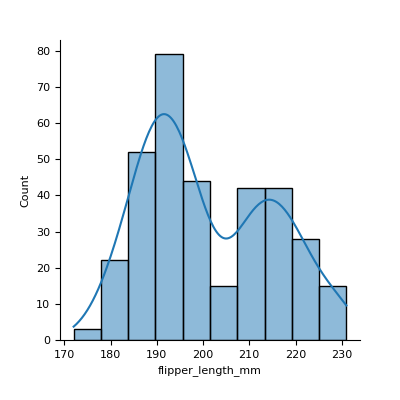

In [36]:
# CanD

c = Canvas(4, 4, "in")

ax = c.add_axis("kdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.histplot(data=penguins, x="flipper_length_mm", kde=True, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

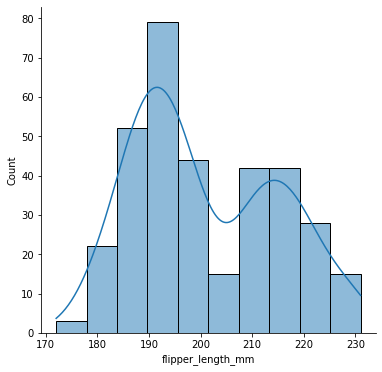

In [37]:
# matplotlib
fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#### 5

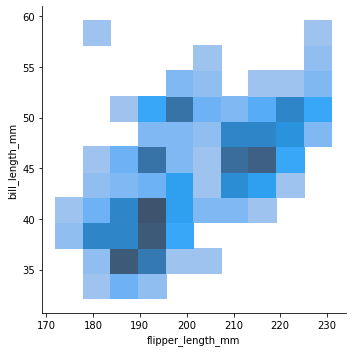

In [38]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

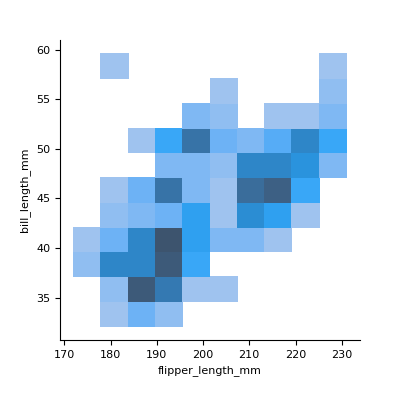

In [39]:
# CanD
c = Canvas(4, 4, "in")

ax = c.add_axis("2Dplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.histplot(penguins, x="flipper_length_mm", y="bill_length_mm", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

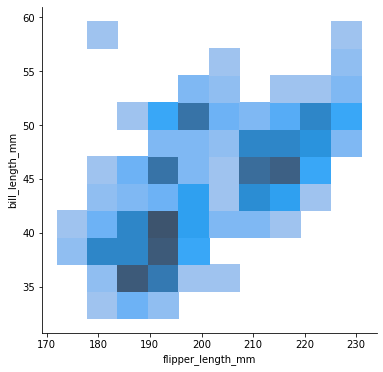

In [40]:
fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(penguins, x="flipper_length_mm", y="bill_length_mm")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#### 6

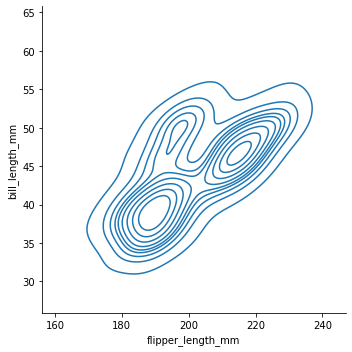

In [41]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde")

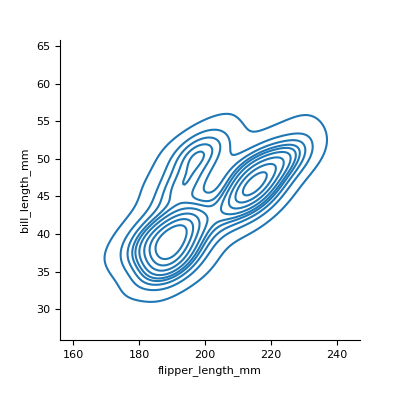

In [42]:
# CanD
c = Canvas(4, 4, "in")

ax = c.add_axis("2Dkdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.kdeplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

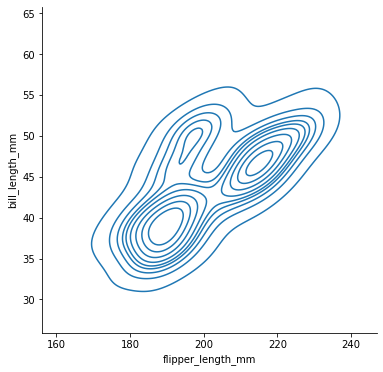

In [43]:
# matplotlib
fig, ax = plt.subplots(figsize=(6,6))

sns.kdeplot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### 7

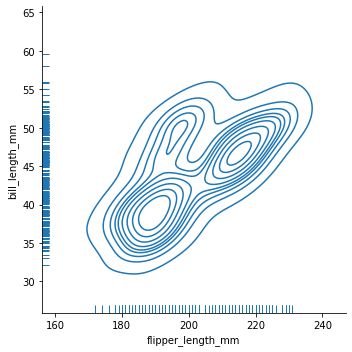

In [44]:
g = sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde", rug=True)

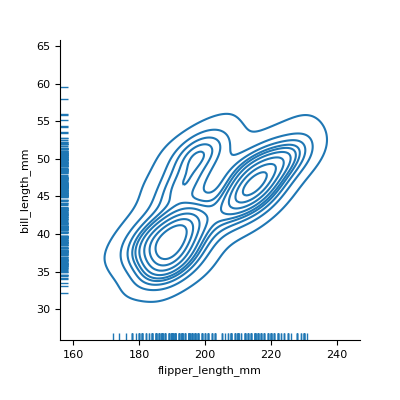

In [45]:
# get default seaborn colour
colour = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

# CanD
c = Canvas(4, 4, "in")

ax = c.add_axis("2Dkdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.kdeplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", color=colour, ax=ax)
sns.rugplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", color=colour, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

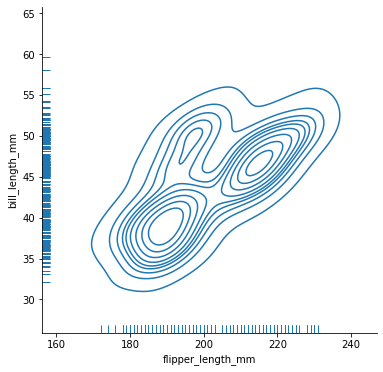

In [46]:
# get default seaborn colour
colour = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765) #g._colors[0]

fig, ax = plt.subplots(figsize=(6,6))

sns.kdeplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", color=colour)
sns.rugplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", color=colour)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### 8

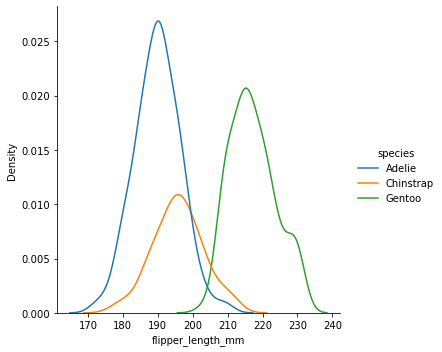

In [47]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")

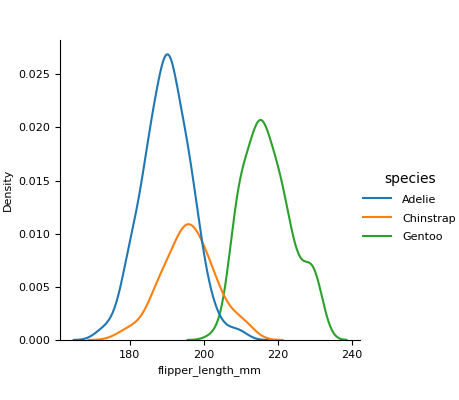

In [48]:
# CanD
c = Canvas(4.6, 4, "in")

ax = c.add_axis("2Dkdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

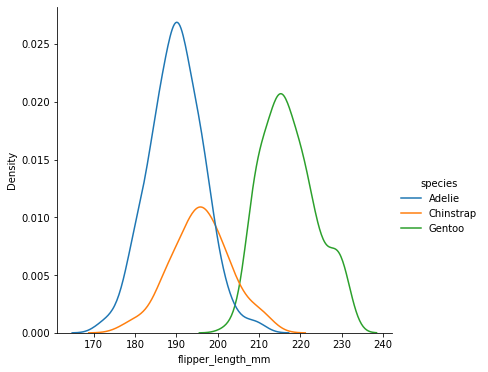

In [49]:
fig, ax = plt.subplots(figsize=(6,6))

sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", ax=ax)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 9

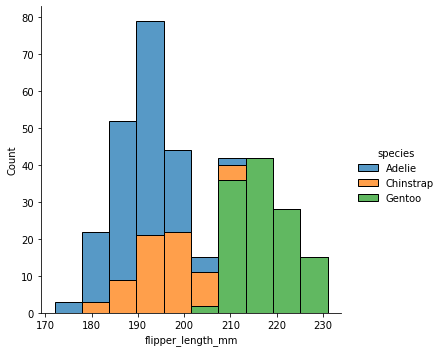

In [50]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

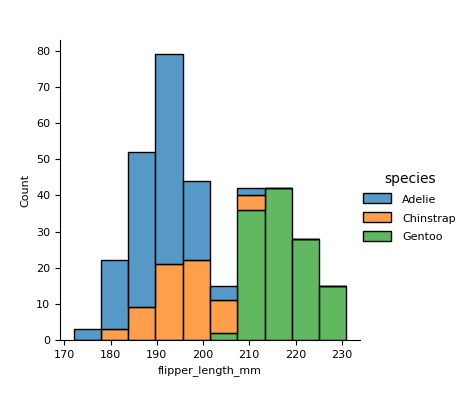

In [51]:
# CanD
c = Canvas(4.6, 4, "in")

ax = c.add_axis("2Dkdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

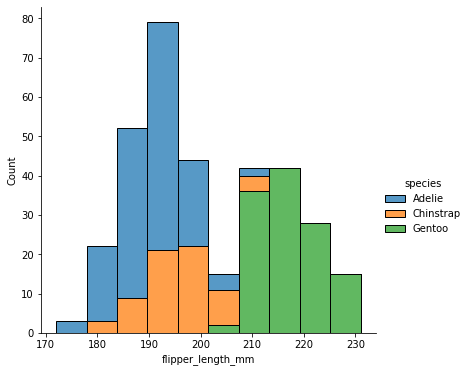

In [52]:
fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 10

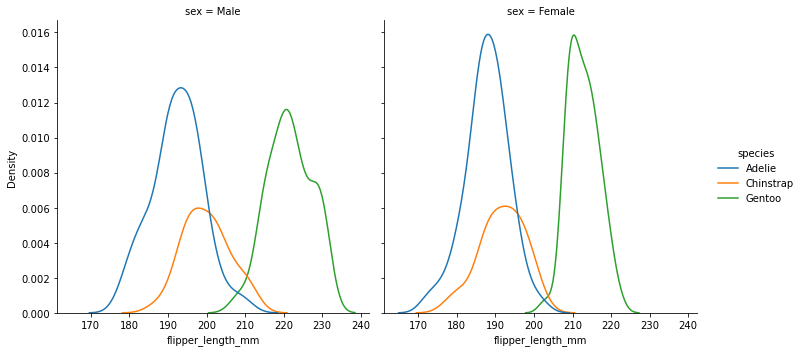

In [53]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="sex", kind="kde")

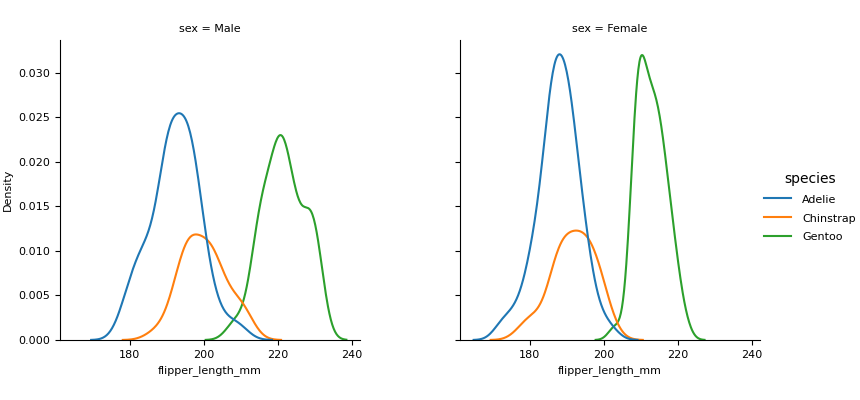

In [54]:
col = "sex"
a = penguins[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.kdeplot(data=penguins[penguins[col]==item], x="flipper_length_mm", hue="species", ax=ax, legend=leg)

    sns.despine(ax=ax)
    
    ax.set_title(f"{col} = {item}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(a[0]).sharey(c.ax(a[i]))  
        c.ax(a[0]).sharex(c.ax(a[i]))          
        # need to rescale all axis
        c.ax(a[i]).autoscale()        

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')     

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

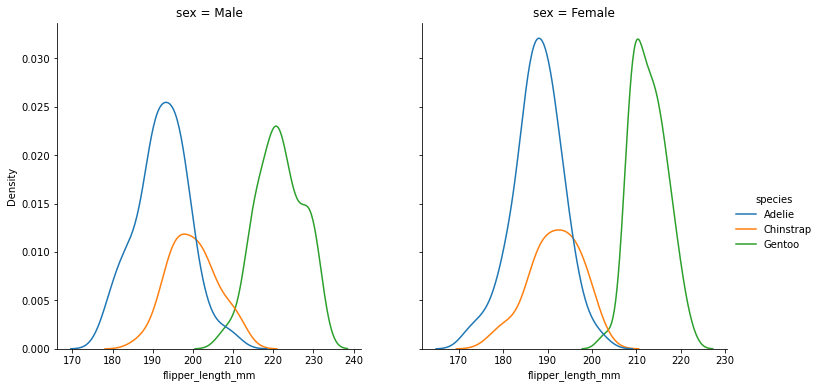

In [55]:
col = "sex"
a = penguins[col].dropna().unique()

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.kdeplot(data=penguins[penguins[col]==item], x="flipper_length_mm", hue="species", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 11

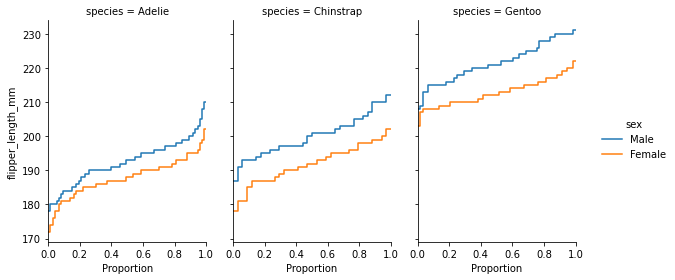

In [56]:
sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",
    kind="ecdf", height=4, aspect=.7,
)


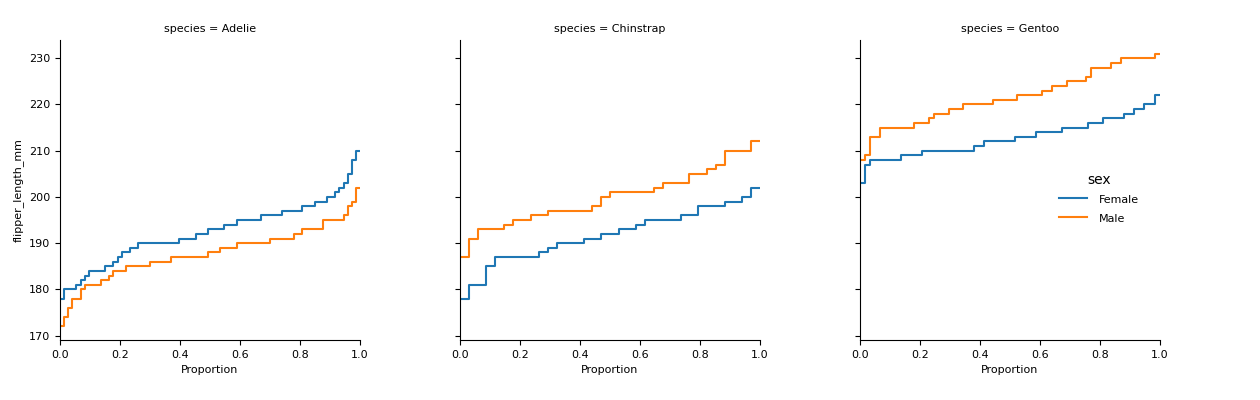

In [57]:
col = "species"
a = penguins[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.ecdfplot(data=penguins[penguins[col]==item], y="flipper_length_mm", hue="sex", ax=ax, legend=leg)
    sns.despine(ax=ax)
    # add a subplot title
    ax.set_title(f"{col} = {item}")
    if i>0:
        # sharey, take the before last axis and sharey with the last plotted one, cannot share 2 axis
        c.ax(a[i]).sharey(c.ax(a[i-1])) 
        # need to rescale all axis
        c.ax(a[i]).autoscale()

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')    

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

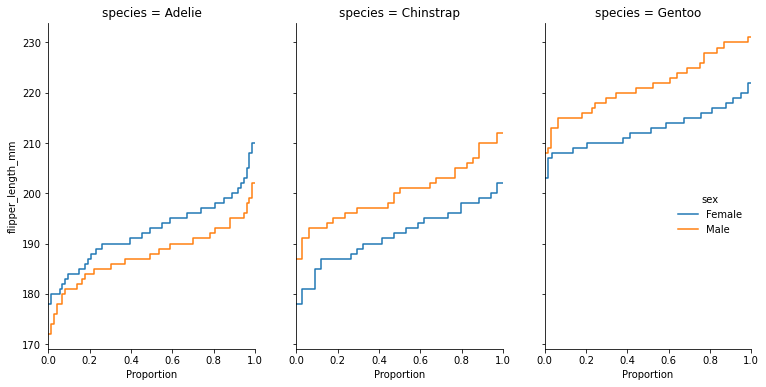

In [58]:
col = "species"
a = penguins[col].dropna().unique()
aspect=.7

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6*aspect, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.ecdfplot(data=penguins[penguins[col]==item], y="flipper_length_mm", hue="sex", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')


#### 12

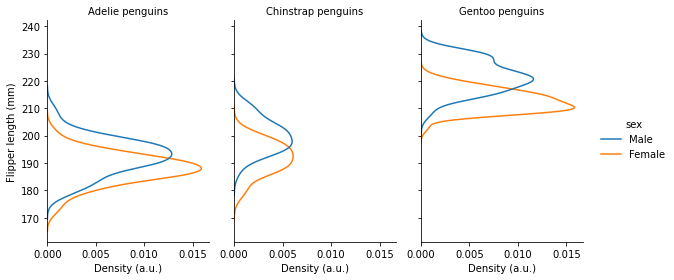

In [59]:
g = sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} penguins")

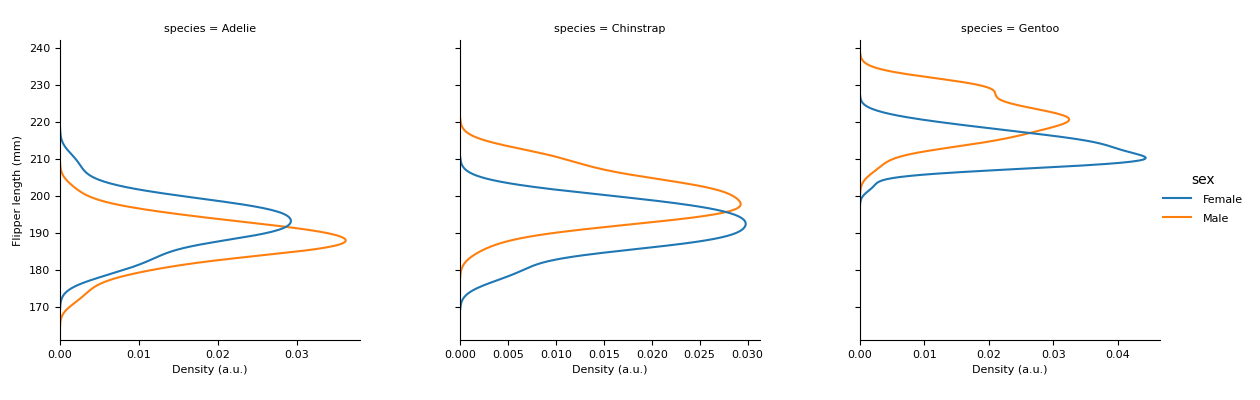

In [60]:
col = "species"
a = penguins[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.kdeplot(data=penguins[penguins[col]==item], y="flipper_length_mm", hue="sex", ax=ax, legend=leg)
    sns.despine(ax=ax)
    # add a subplot title
    ax.set_title(f"{col} = {item}")
    ax.set_xlabel("Density (a.u.)")
    ax.set_ylabel("Flipper length (mm)")    
    if i>0:
        # sharey, take the before last axis and sharey with the last plotted one, cannot share 2 axis
        c.ax(a[i]).sharey(c.ax(a[i-1])) 
        # need to rescale all axis
        c.ax(a[i]).autoscale()

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')     

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

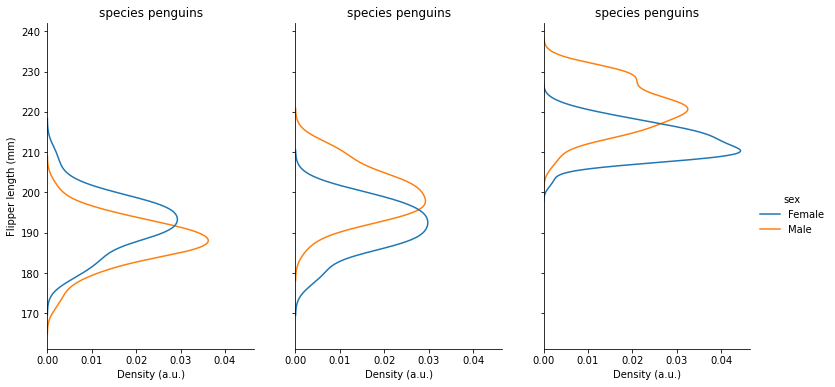

In [61]:
col = "species"
a = penguins[col].dropna().unique()
aspect=.7

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6*aspect, 6), sharey=True, sharex=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.kdeplot(data=penguins[penguins[col]==item], y="flipper_length_mm", hue="sex", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} penguins")
    ax.set_xlabel("Density (a.u.)")
    ax.set_ylabel("Flipper length (mm)")
    

ax.legend_.set_bbox_to_anchor((1.4, 0.5))
# remove the border, https://stackoverflow.com/questions/25540259/remove-or-adapt-border-of-frame-of-legend-using-matplotlib
ax.legend_.get_frame().set_edgecolor('none')



In [62]:
%load_ext watermark
%watermark -n -u -v -iv -w

seaborn 0.11.0
last updated: Sun Jul 04 2021 

CPython 3.8.5
IPython 7.18.1
watermark 2.0.2
